LOADING IN THE DATA

In [2]:
import tensorflow as tf
import pandas as pd

data = pd.read_csv('cover_data.csv')


DIVIDING UP AND STANDARDIZING THE DATA

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

X = data.drop(['class'], axis=1)
y = np.array(data['class']) - 1


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(54,)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(7, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, validation_data = (X_test, y_test), callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)])

model.evaluate(X_test, y_test)
model.save('cover_model.h5')


Epoch 1/50
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 14s 891us/step - accuracy: 0.7367 - loss: 0.6251 - val_accuracy: 0.7937 - val_loss: 0.4903
Epoch 2/50
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 14s 961us/step - accuracy: 0.8007 - loss: 0.4697 - val_accuracy: 0.8125 - val_loss: 0.4397
Epoch 3/50
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 14s 968us/step - accuracy: 0.8190 - loss: 0.4296 - val_accuracy: 0.8239 - val_loss: 0.4179
Epoch 4/50
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.8288 - loss: 0.4092 - val_accuracy: 0.8295 - val_loss: 0.4046
Epoch 5/50
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.8366 - loss: 0.3914 - val_accuracy: 0.8392 - val_loss: 0.3888
Epoch 6/50
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.8405 - loss: 0.3828 - val_accuracy: 0.8390 - val_loss: 0.3895
Epoch 7/50
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.8442 - loss: 0.3737 - val_accuracy: 0.8474 - val_loss: 0.3690
Epoch 8/50
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accu

PLOTTING THE TRAINING DATA AND RESULTS

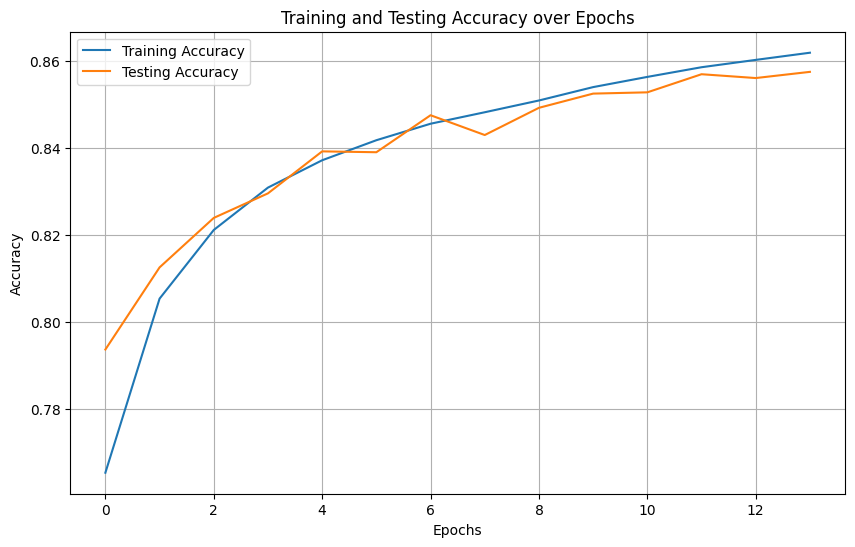

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()